In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#Reading the file
data=pd.read_csv('Car_Insurance_Claim 1.csv')

In [30]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [31]:
#Remove the ID column
data=data.drop('ID' , axis=1)

EDA data

In [32]:
#General information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  int64  
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

Two columns CREDIT_SCORE ,  ANNUAL_MILEAGE contain null values

In [33]:
missing_value=data.isnull().sum()

In [34]:
missing_value

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [35]:
#Numeric  columns
data.select_dtypes(include=['number']).columns

Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [36]:
#non-numeric columns
data.select_dtypes(include=['object']).columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

In [37]:
#number of value column OUTCOME
data['OUTCOME'].value_counts()

OUTCOME
0    6867
1    3133
Name: count, dtype: int64

The variable 'OUTCOME' is imbalanced.

In [38]:
#Removing outliers using the box plot method
def remove_outliers(data,columns):
    for col in columns:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IRQ=Q3-Q1
        lower=Q1-(IRQ*1.5)
        upper=Q3+(IRQ*1.5)
        data=data[(data[col]>=lower) & (data[col]<=upper)]
    return data


numeric_null_columns=['CREDIT_SCORE','ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS','PAST_ACCIDENTS']
#Calling function to remove outliers
cleaned_data=remove_outliers(data,numeric_null_columns)

In [39]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5681 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  5681 non-null   object 
 1   GENDER               5681 non-null   object 
 2   RACE                 5681 non-null   object 
 3   DRIVING_EXPERIENCE   5681 non-null   object 
 4   EDUCATION            5681 non-null   object 
 5   INCOME               5681 non-null   object 
 6   CREDIT_SCORE         5681 non-null   float64
 7   VEHICLE_OWNERSHIP    5681 non-null   int64  
 8   VEHICLE_YEAR         5681 non-null   object 
 9   MARRIED              5681 non-null   int64  
 10  CHILDREN             5681 non-null   int64  
 11  POSTAL_CODE          5681 non-null   int64  
 12  ANNUAL_MILEAGE       5681 non-null   float64
 13  VEHICLE_TYPE         5681 non-null   object 
 14  SPEEDING_VIOLATIONS  5681 non-null   int64  
 15  DUIS                 5681 non-null   int64 

removed oultier from data

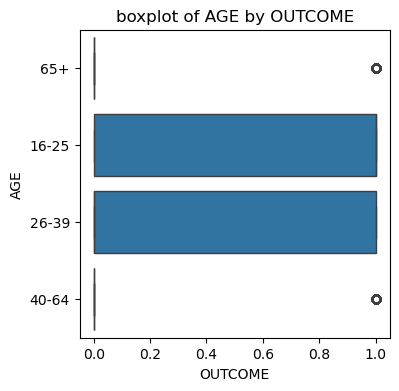

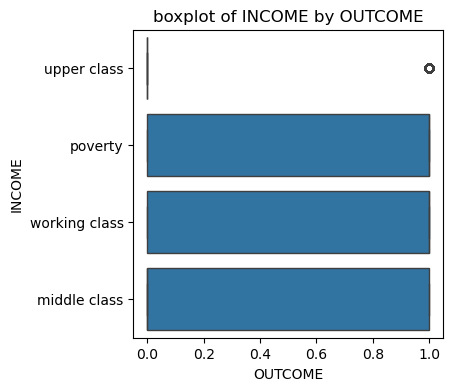

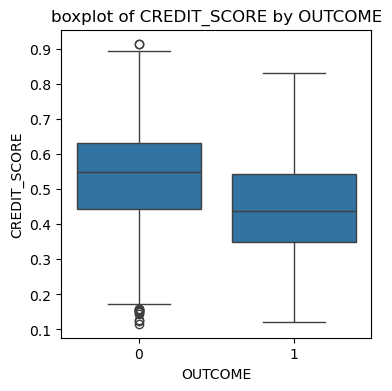

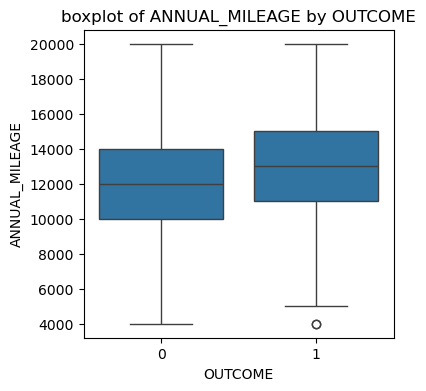

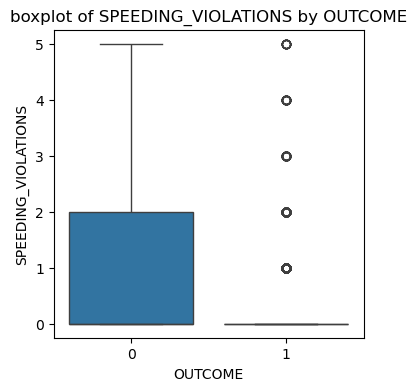

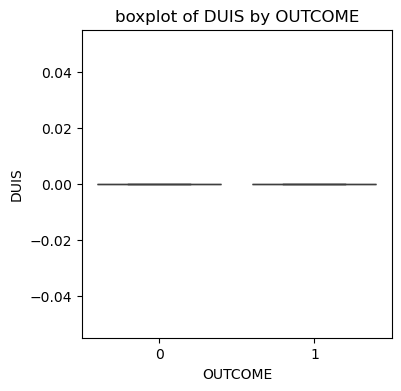

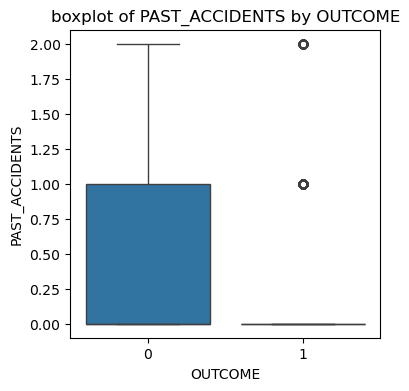

In [40]:
#EDA on OUTCOME columns
import seaborn as sns
numerical_columns=['AGE', 'INCOME', 'CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
for col in numerical_columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(cleaned_data , x='OUTCOME', y=col)
    plt.title(f"boxplot of {col} by OUTCOME")
    plt.show()
    

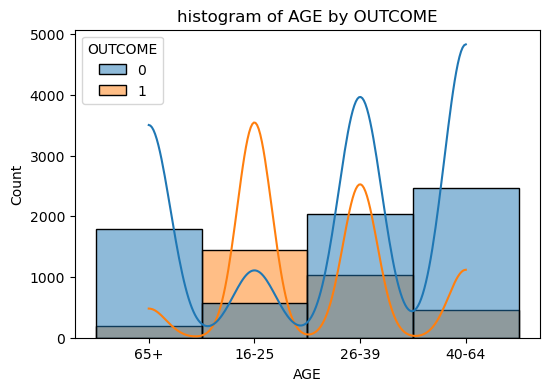

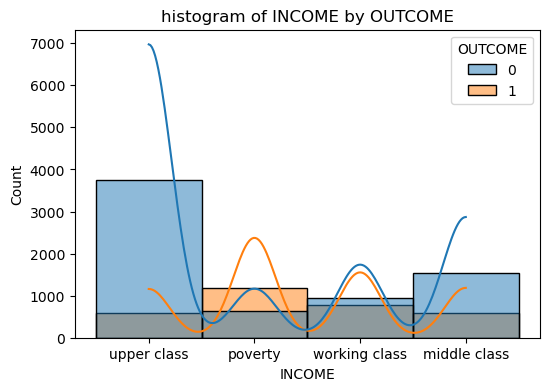

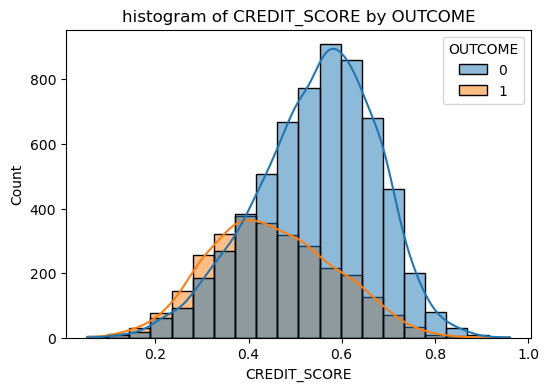

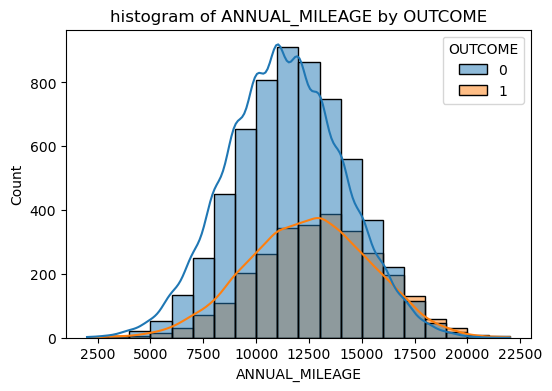

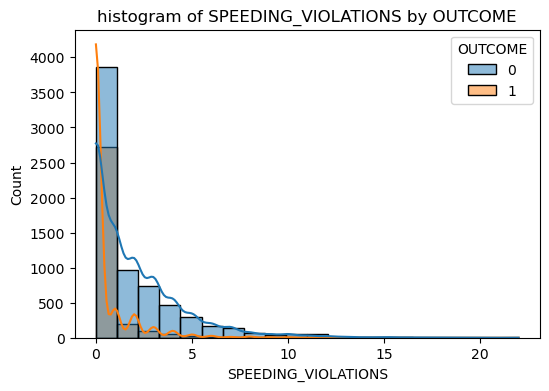

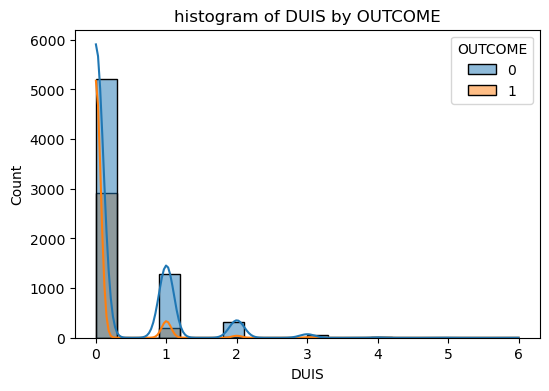

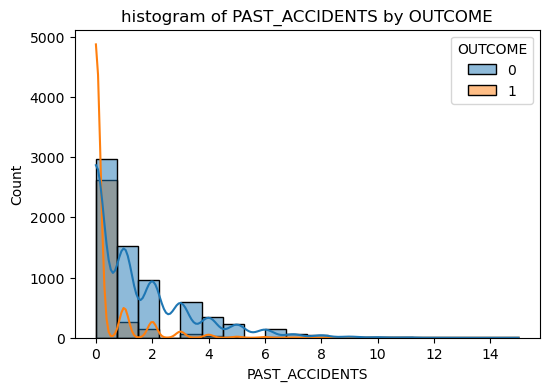

In [41]:
#histogram for better understanding
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data, x=col , hue='OUTCOME', kde=True, bins=20)
    plt.title(f"histogram of {col} by OUTCOME")
    plt.show()

خوب میشه از روی ستون سن فهمید که افراد پرریسک در گروه سنی 16 تا 25 سال هستند و بیشتر افراد کم ریسک در گروه های سنی 26تا 39 و 40 تا 64 هستند
از ستون درآمد هم میتوان دریافت که طبقه ای که فقیر هستند افرادپرریک تری برای دریافت بیمه هستند و افراد طبقه ی بالا که تعدا زیادی هم در این گروه قرار دارند افراد کم ریسکی هستند البته افراد قشر کارگر و با درآمد متوسط نیز تقریبا به یک میزان به اندازه ی تعدادشان کم ریسک و پرریسک هستند
برای ستون امتیاز اعتبار یکم بیشتر برای افراد کم ریسک داده های پرت بیشتری نسبت به سایر متغیرها دیده میشه و همچنین توزیع افراد کم ریسک و پرریسک تقریبا توزیع نرمال است و میانگین امتیاز افراد کم ریسک بیشتر است
برای ستون مسافت طی شده در طول سال به طور متوسط افرادی که پر ریسک و کم ریسک بودند میانگین مسافت طی شده حدودا یکسانی داشتند
برای ستون تخلفات سرعت میشه اینطور تحلیل کرد که تعداد تخلف بر اثر سرعت بیشتر، تاثیری در پرریسک بودن افراد نداره البته داده های پرت در باکس پلات برای گروه پرریسک وجود دارد
همچنین تعداد تصادفات بیشتر در گذشته هم تاثیر زیادی در پرریسک بودن افراد ندارد

In [42]:
#imbalance data with oversampling
data_group_by_outcome=cleaned_data.groupby(['OUTCOME'])
print(data_group_by_outcome.size())
maxclasssize=data_group_by_outcome.size().max()

OUTCOME
0    3401
1    2280
dtype: int64


In [43]:
data_balance=data_group_by_outcome.apply(lambda x: x.sample(maxclasssize, replace=True)).reset_index(drop=True)
data_balance.head()                                   

C:\Users\sepideh\AppData\Local\Temp\ipykernel_14828\1336021170.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_balance=data_group_by_outcome.apply(lambda x: x.sample(maxclasssize, replace=True)).reset_index(drop=True)


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,26-39,female,majority,10-19y,none,poverty,0.242735,0,before 2015,0,1,32765,8000.0,sedan,2,0,0,0
1,26-39,male,majority,10-19y,none,middle class,0.362737,1,before 2015,0,1,10238,14000.0,sedan,1,0,0,0
2,65+,male,majority,20-29y,university,upper class,0.694265,1,after 2015,1,1,92101,11000.0,sedan,3,0,1,0
3,40-64,female,majority,0-9y,high school,upper class,0.772592,1,before 2015,0,1,10238,10000.0,sedan,0,0,0,0
4,40-64,female,majority,20-29y,high school,middle class,0.424989,1,after 2015,1,1,92101,13000.0,sedan,4,0,2,0


In [44]:
data_new=data_balance.groupby(['OUTCOME'])
data_new.size()

OUTCOME
0    3401
1    3401
dtype: int64

In [45]:
#one-hot Encoding by get_dummies pandas
categorical_columns=['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION','INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']
data_new_encoding=pd.get_dummies(data_balance , columns=categorical_columns)
data_new_encoding.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,...,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,0.242735,0,0,1,32765,8000.0,2,0,0,0,...,True,False,False,True,False,False,False,True,True,False
1,0.362737,1,0,1,10238,14000.0,1,0,0,0,...,True,False,True,False,False,False,False,True,True,False
2,0.694265,1,1,1,92101,11000.0,3,0,1,0,...,False,True,False,False,True,False,True,False,True,False
3,0.772592,1,0,1,10238,10000.0,0,0,0,0,...,False,False,False,False,True,False,False,True,True,False
4,0.424989,1,1,1,92101,13000.0,4,0,2,0,...,False,False,True,False,False,False,True,False,True,False


In [46]:
# data scaling and train_test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=data_new_encoding.drop(columns=['OUTCOME'])
y=data_new_encoding['OUTCOME']
scaler=StandardScaler()
X=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y , random_state=123)
print(f"Training data: {x_train.shape} samples")
print(f"Test data: {x_test.shape} samples")

Training data: (5101, 32) samples
Test data: (1701, 32) samples


In [47]:
#classification with DecisionTreeClassifier and svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
dt_model=DecisionTreeClassifier(random_state=123)
dt_model.fit(x_train,y_train)
dt_pred=dt_model.predict(x_test)
print('accuracy with DecisionTreeClassifier : ', accuracy_score(y_test , dt_pred))
print('DecisionTree classification_report: \n', classification_report(y_test , dt_pred))
print('confusion matrix :\n ' ,confusion_matrix(y_test , dt_pred))

print('\n \n' )

svm_model=SVC(kernel='linear' , random_state=123)
svm_model.fit(x_train , y_train)
svm_pred=svm_model.predict(x_test)
print('accuracy with svm : ' ,accuracy_score(y_test , svm_pred))
print('svm classification_report : \n', classification_report(y_test , svm_pred))
print('confusion matrix :\n ' ,confusion_matrix(y_test , svm_pred))

accuracy with DecisionTreeClassifier :  0.8953556731334509
DecisionTree classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       866
           1       0.88      0.91      0.89       835

    accuracy                           0.90      1701
   macro avg       0.90      0.90      0.90      1701
weighted avg       0.90      0.90      0.90      1701

confusion matrix :
  [[766 100]
 [ 78 757]]

 

accuracy with svm :  0.8030570252792475
svm classification_report : 
               precision    recall  f1-score   support

           0       0.86      0.74      0.79       866
           1       0.76      0.87      0.81       835

    accuracy                           0.80      1701
   macro avg       0.81      0.80      0.80      1701
weighted avg       0.81      0.80      0.80      1701

confusion matrix :
  [[638 228]
 [107 728]]


In [48]:
data_feature_importances=pd.DataFrame({'feature': x.columns,'feature_importances': dt_model.feature_importances_})
data_feature_importances=data_feature_importances.sort_values(by='feature_importances', ascending=False)
data_feature_importances

,feature,feature_importances
0,CREDIT_SCORE,0.215027
17,DRIVING_EXPERIENCE_0-9y,0.214993
5,ANNUAL_MILEAGE,0.096379
1,VEHICLE_OWNERSHIP,0.086628
4,POSTAL_CODE,0.082686
29,VEHICLE_YEAR_before 2015,0.073174
18,DRIVING_EXPERIENCE_10-19y,0.028940
10,AGE_26-39,0.020943
3,CHILDREN,0.013880
28,VEHICLE_YEAR_after 2015,0.013418


In [49]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel':('linear' , 'rbf', 'sigmoid'),
            'C': [0.01 , 0.1 , 1 , 10 , 100],
            'gamma' : ['scale', 'auto', 0.01, 0.1, 1, 10]}
svm=SVC()
clf=GridSearchCV(estimator=svm , param_grid=parameters )
clf.fit(x_train,y_train)
print('best estimator : ' ,clf.best_estimator_)
print('clf accuracy : ', accuracy_score(clf.predict(x_test) , y_test))

best estimator :  SVC(C=100, gamma=0.1)
clf accuracy :  0.8741916519694297


In [50]:
print('Best Parameters:', clf.best_params_)

Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [51]:
#svm with best parameters
svm=SVC(C=100, gamma= 0.1 ,kernel= 'rbf', random_state=123)
svm.fit(x_train,y_train)
svm_pred_new=svm.predict(x_test)
print('accuracy with svm : ' ,accuracy_score(y_test , svm_pred_new))
print('svm classification_report : \n', classification_report(y_test , svm_pred_new))
print('confusion matrix :\n ' ,confusion_matrix(y_test , svm_pred_new))

accuracy with svm :  0.8741916519694297
svm classification_report : 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       866
           1       0.86      0.89      0.87       835

    accuracy                           0.87      1701
   macro avg       0.87      0.87      0.87      1701
weighted avg       0.87      0.87      0.87      1701

confusion matrix :
  [[742 124]
 [ 90 745]]
